In [2]:
import pandas as pd

In [3]:
url = ("https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv")
df = pd.read_csv(url,sep=';')

##  **Análisis Exploratorio de Datos (EDA)**
El proceso de Análisis Exploratorio de Datos (EDA) consiste en comprender cómo están estructurados los datos que queremos analizar.

Es un proceso de naturaleza investigativa, donde intentamos entender diversas características, como: los valores presentes en las columnas, los tipos de estructura de datos, verificar si son datos cualitativos o cuantitativos, si hay valores faltantes o inusuales.

## **Demandas de ML**
#### ¿Cuáles son los valores promedio de alquiler por tipo de propiedad?

In [11]:
df.head(2)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN


In [10]:
df.groupby('Tipo')['Valor'].mean(numeric_only=True)

Tipo
Casa                           31453.177064
Casa Comercial                 54735.841584
Casa de Condominio             51428.609836
Casa de Vecindad                5961.740506
Cochera/Estacionamiento         6995.454545
Cocineta                        4425.856061
Conjunto Comercial/Sala        57675.214550
Departamento                   18683.269431
Departamento en Hotel          16285.430769
Edificio Completo             409418.080645
Estudio                         8400.000000
Galpón/Depósito/Almacén       299984.140138
Hotel                          87500.000000
Industria                     420000.000000
Loft                            9924.526316
Loteo/Condominio               92166.666667
Posada/Chalé                    5180.000000
Rancho                         38014.375000
Terreno Estándar              135364.444444
Tienda en Centro Comercial     32556.785714
Tienda/Salón                   56263.544252
Name: Valor, dtype: float64

In [12]:
df.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values(by='Valor', ascending=False)


,Valor
Tipo,
Industria,420000.000000
Edificio Completo,409418.080645
Galpón/Depósito/Almacén,299984.140138
Terreno Estándar,135364.444444
Loteo/Condominio,92166.666667
Hotel,87500.000000
Conjunto Comercial/Sala,57675.214550
Tienda/Salón,56263.544252
Casa Comercial,54735.841584


In [15]:
df_tipo_precio = df.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values(by='Valor', ascending=False)

<Axes: ylabel='Tipo'>

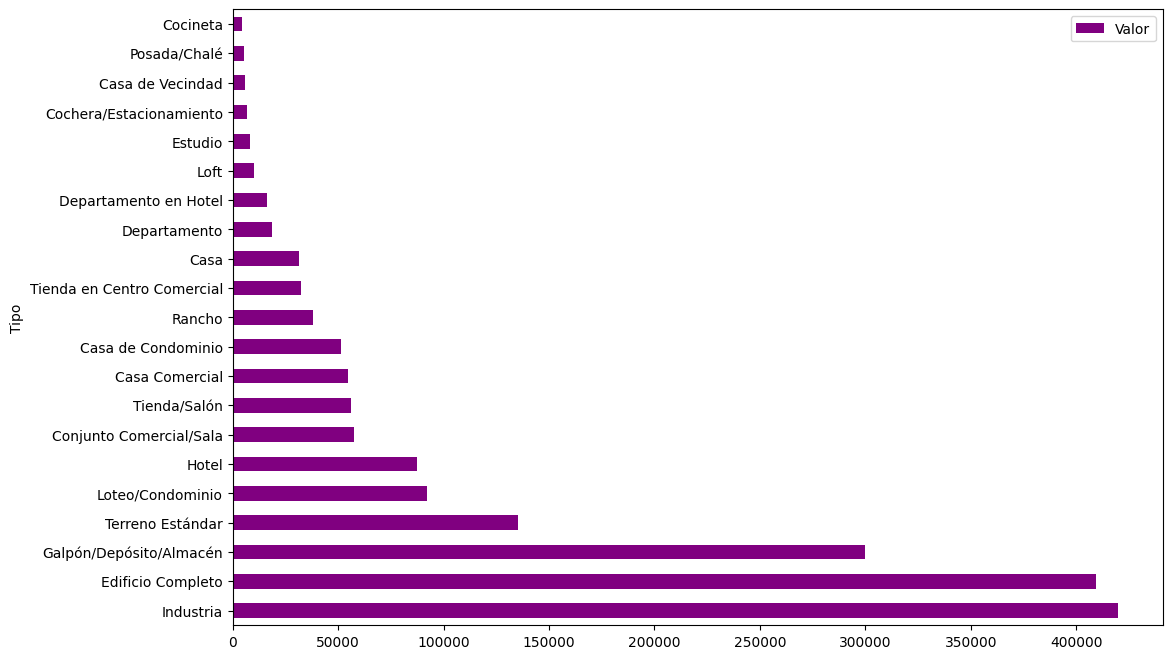

In [16]:
df_tipo_precio.plot(kind='barh',figsize=(12,8),color = 'purple')

## El método groupby
Permite agrupar y resumir datos de un DataFrame basado en uno o más criterios. Estos criterios pueden ser variables numéricas o categóricas, como columnas o índices del DataFrame.

Este método tiene varios parámetros, algunos de los cuales son:

- by: Este es el parámetro más común y se utiliza para especificar la columna o columnas por las cuales queremos agrupar. Como argumento, podemos pasar el nombre de una columna o una lista de nombres de columnas;

- axis: Utilizamos este parámetro para especificar el eje a lo largo del cual queremos agrupar. El valor predeterminado es 0, lo que significa que se agruparán las filas. Si deseamos agrupar las columnas, debemos establecer este parámetro en 1;

- sort: Este parámetro es un booleano (True o False) que indica si los grupos deben ordenarse por el valor de la columna de agrupación. El valor predeterminado es True;

- dropna: Utilizamos este parámetro para controlar si los valores faltantes (NaN) se eliminarán o no durante el proceso de agrupación. El valor predeterminado es True.

In [26]:
df.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [27]:
inmuebles_comerciales = ['Conjunto Comercial/Sala',
      'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria']

In [28]:
# Ahora vamos a empezar a filtrar
df.query('@inmuebles_comerciales not in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25115,Casa de Condominio,Santa Fe,5,3,4,450,52500.0,5988.5,8162.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [44]:
df_residencial = df.query('@inmuebles_comerciales not in Tipo')

<Axes: ylabel='Tipo'>

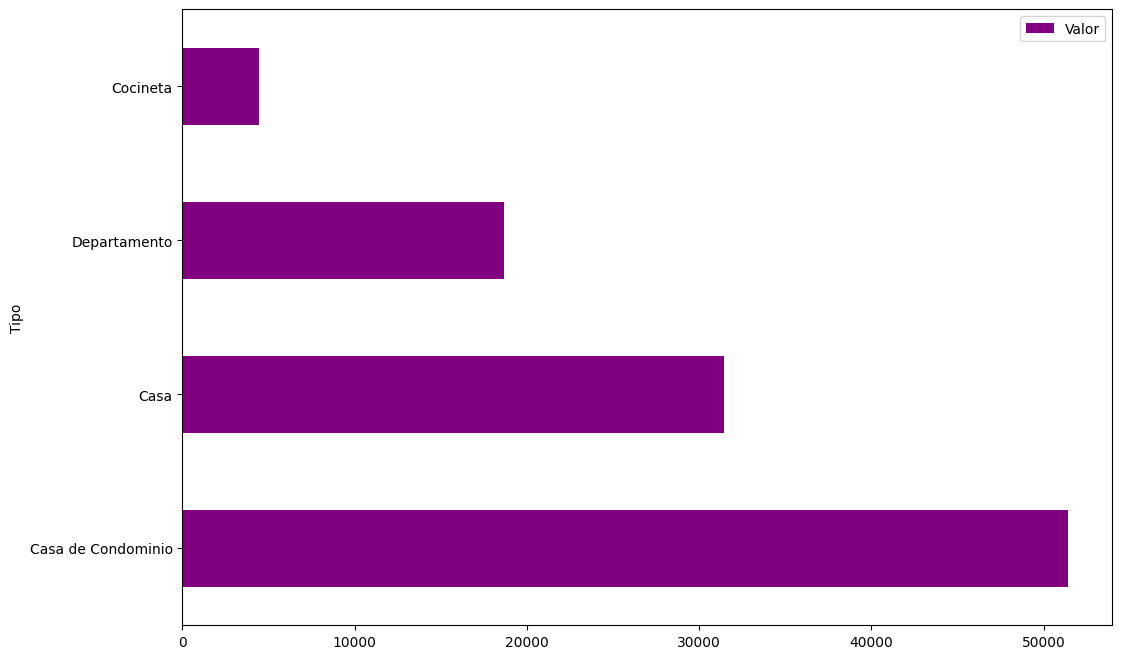

In [34]:
df_residencial = df_residencial.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values(by='Valor', ascending=False)
df_residencial.plot(kind='barh',figsize=(12,8),color = 'purple')

## Porcentaje de cada tipo de inmueble presente en la base de datos.

In [45]:
df_residencial.Tipo.value_counts(normalize=True)

Tipo
Departamento          0.886993
Cocineta              0.043617
Casa de Condominio    0.036648
Casa                  0.032743
Name: proportion, dtype: float64

In [47]:
# Vamos a normalizar los datos
df_residencial.query('Tipo == "Departamento"')
df.head(2)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN


<Axes: xlabel='Tipo de Inmueble', ylabel='Porcentaje'>

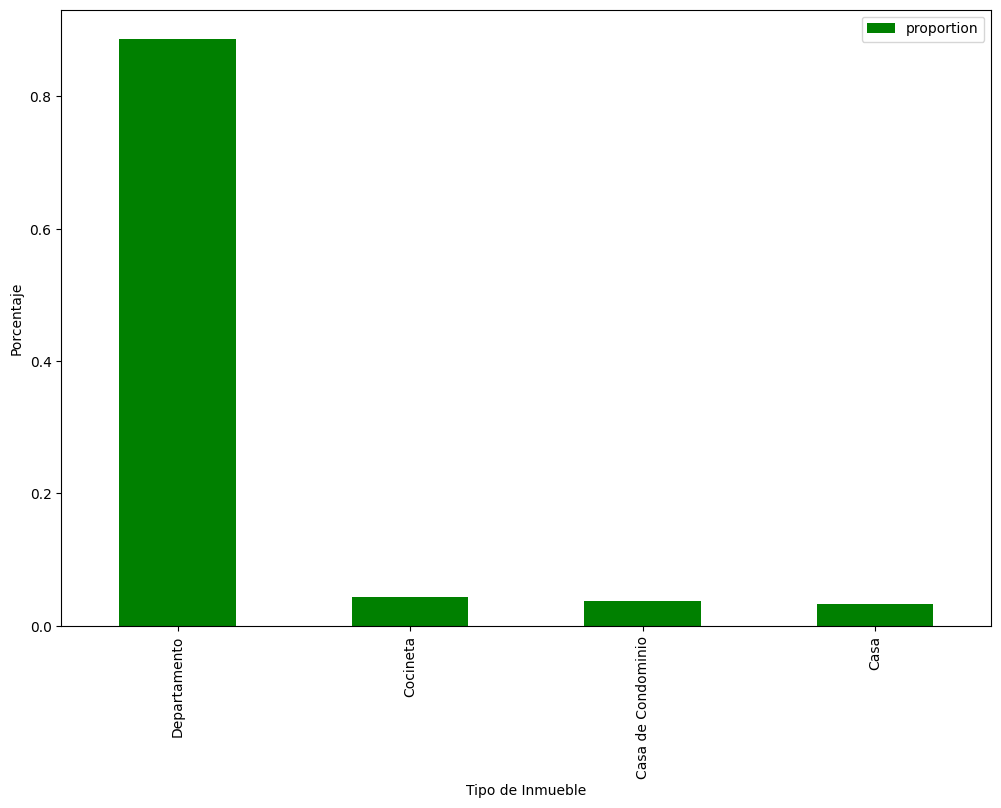

In [50]:
porcentaje_tipo = df_residencial.Tipo.value_counts(normalize=True).to_frame()
porcentaje_tipo.plot(kind = 'bar',figsize=(12,8),color='green',xlabel='Tipo de Inmueble',ylabel='Porcentaje')

> El método rename() para cambiar el nombre de esa columna. Este método nos permite especificar un diccionario que asocia el nombre antiguo de la columna con el nuevo nombre que deseamos asignar.

### Desafío: vamos a practicar
- Calcular el promedio de habitaciones por departamento.
- Verificar cuántas colonias únicas existen en nuestra base de datos.
- Analizar qué colonias tienen el promedio de alquiler más alto.
- Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.

In [66]:
# 1. Calcular el promedio de habitaciones por departamento.
df['Habitaciones'].mean()

np.float64(1.7488555391903189)

In [67]:
# 2. Verificar cuántas colonias únicas existen en nuestra base de datos.
print(f"El total de colonias únicas son: {len(df.Colonia.unique())}")

El total de colonias únicas son: 88


In [61]:
# 3. Analizar qué colonias tienen el promedio de alquiler más alto.
df_colonias = df.groupby('Colonia').mean(numeric_only=True).sort_values(by='Valor', ascending=False)[['Valor']]

<Axes: xlabel='Colonias', ylabel='Promedio de Alquiler'>

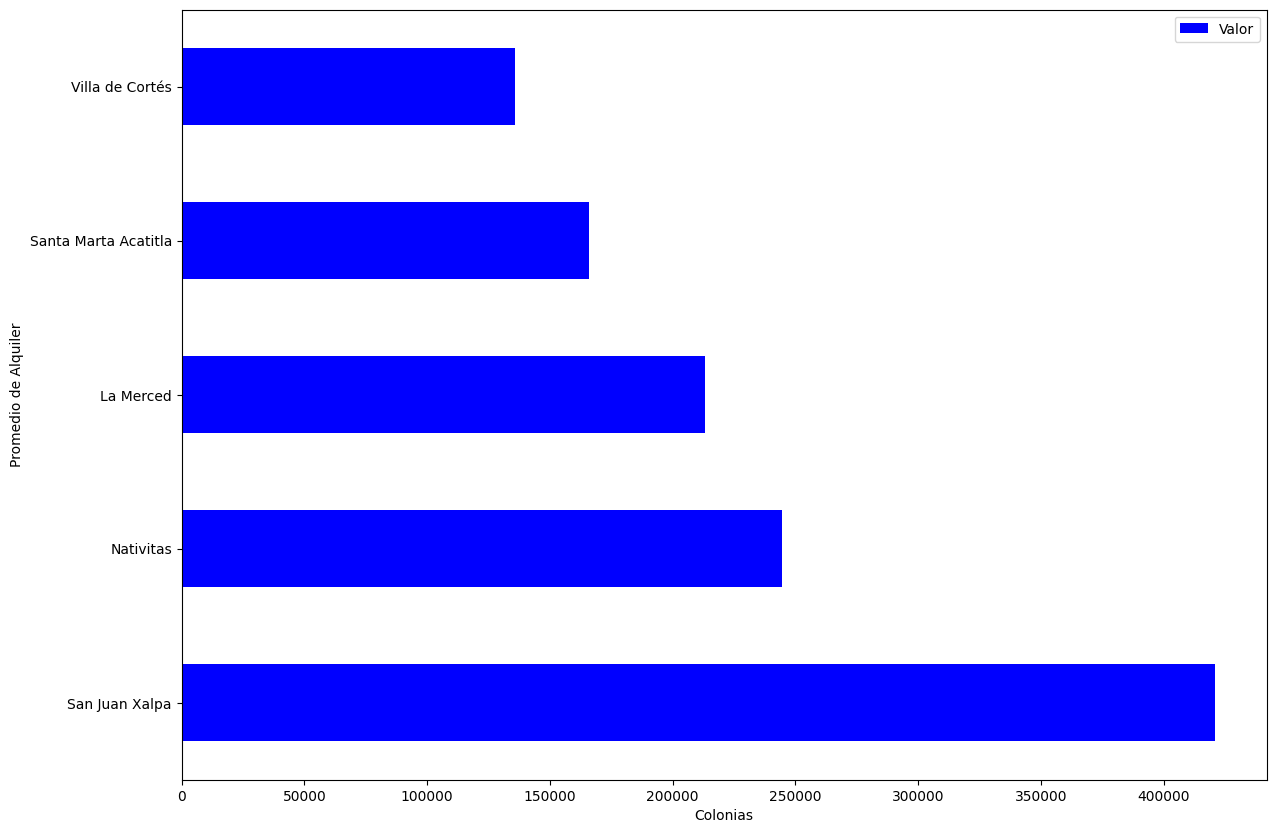

In [69]:
# 4. Crea un graficode barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.
df_colonias.head(5).plot(kind = 'barh',figsize = (14,10),color = 'blue',xlabel = 'Colonias', ylabel = 'Promedio de Alquiler')